In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv(r"C:\Users\reals\Downloads\bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## EDA and Data Cleaning

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
## Droping columns for making our data set normal
df2 = df1.drop(columns={'area_type','availability','balcony','society'})
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
# Searching for null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# droping null values 
df3 = df2.dropna()

In [8]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# Creating a new column bhk on behalf of size column but only taking int data for all rows not the text with it  
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

C:\Users\reals\AppData\Local\Temp\ipykernel_16272\1975332048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))


In [11]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
# These are our outliers
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# function to detect float values are in the column or not 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [16]:
# Applying the function to our sqr foot column but using (~) neget to see all the other values in it 
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
## This function is used to convert gven Square foot range to actual Square foot 
def convert_SQ_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None


In [18]:
df4 = df3.copy()

## Applying CConverting square foot range values to numbers function on our Total Suare foot column 
df4['total_sqft'] = df4['total_sqft'].apply(convert_SQ_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
# Now seeing the 30th index value of our data which was given in a range in SQuare foot now after applying the function 
# we got it solved in numeric data 
df4.loc[30] 

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## Feature Engineering

 Seeking for unique values 

 outliers between rows and columns 
 
 choosing Righht Algorithem For our prediction model 

In [20]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
## Cppied data from df4 to df5
df5 = df4.copy()

In [22]:
## Getting price per Square foot using the formula 
df5['Price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
# Length of unique values 
len(df5['location'].unique())

1304

In [24]:

# Writing a lambda function for counting the Apperiance of locations  that how many time each location Appeared
df5.location = df5.location.apply(lambda x: x.strip())
location_states = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_states

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [25]:
## location's havving less then equals to 10 rows
location_states_less10 = location_states[location_states <=10]
location_states_less10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [26]:
len(location_states[location_states <=10])

1052

In [27]:
# tansforming location data by a lambda function 
# If any location appeared more than 10 times converts that name to Other
df5.location = df5.location.apply(lambda x: 'Other' if x in location_states_less10 else x)
df5.head(10)

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [28]:
# Getting an Example of data having less Sqft but more rooms and bath's as an outlier
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [29]:
df5.shape

(13246, 7)

In [30]:
# Removing those unneccessary data lines (Thresholds) by filtring them using ( ~ ) Neget
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12502, 7)

In [31]:
df6.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'Price_per_sqft'],
      dtype='object')

In [32]:
df6.Price_per_sqft.describe()
# so here we can see that minimum value and maximum vallues are higher then the 1st and 3rd percentile so we need to clear them for 
# better understanding of the data distribution

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

In [33]:
# Creating a Function for removing price per Sqft outliers on locations because some locations have less privce and some locations have high
# price so we need to get mean of per location and STandard daviation of per location for removing those outliers
def remove_pps_outliars(df): # taking df as an input 
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'): #Grouping by location and for per location iam getting subdf with whom 
        m = np.mean(subdf.Price_per_sqft) # iam getting mean of it
        st = np.std(subdf.Price_per_sqft) # and getting standard daviation 
        reduced_df = subdf[(subdf.Price_per_sqft > (m-st)) & (subdf.Price_per_sqft < (m+st))] #Filtring data which is Above mean -1 std and anything below  mean + 1 std we are keeping it in reduced_df
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) # we will keep on appending per location
    return df_out # returning the output dataset


df7 = remove_pps_outliars(df6) # calling the function and storing the filtered data in a new dataframe
df7.shape

(10241, 7)

In [34]:
# Creating a function for displaying A scatter plot for 2 bedroom price  and 3 bedrooom price to examine the data more 

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3  = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50 )
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color='green',label='3 BHK',s=50 )
    plt.xlabel('Total Area in Sqft')
    plt.ylabel('Price per Sqft')
    plt.title('Scatter Chart for '+location)
    plt.legend()

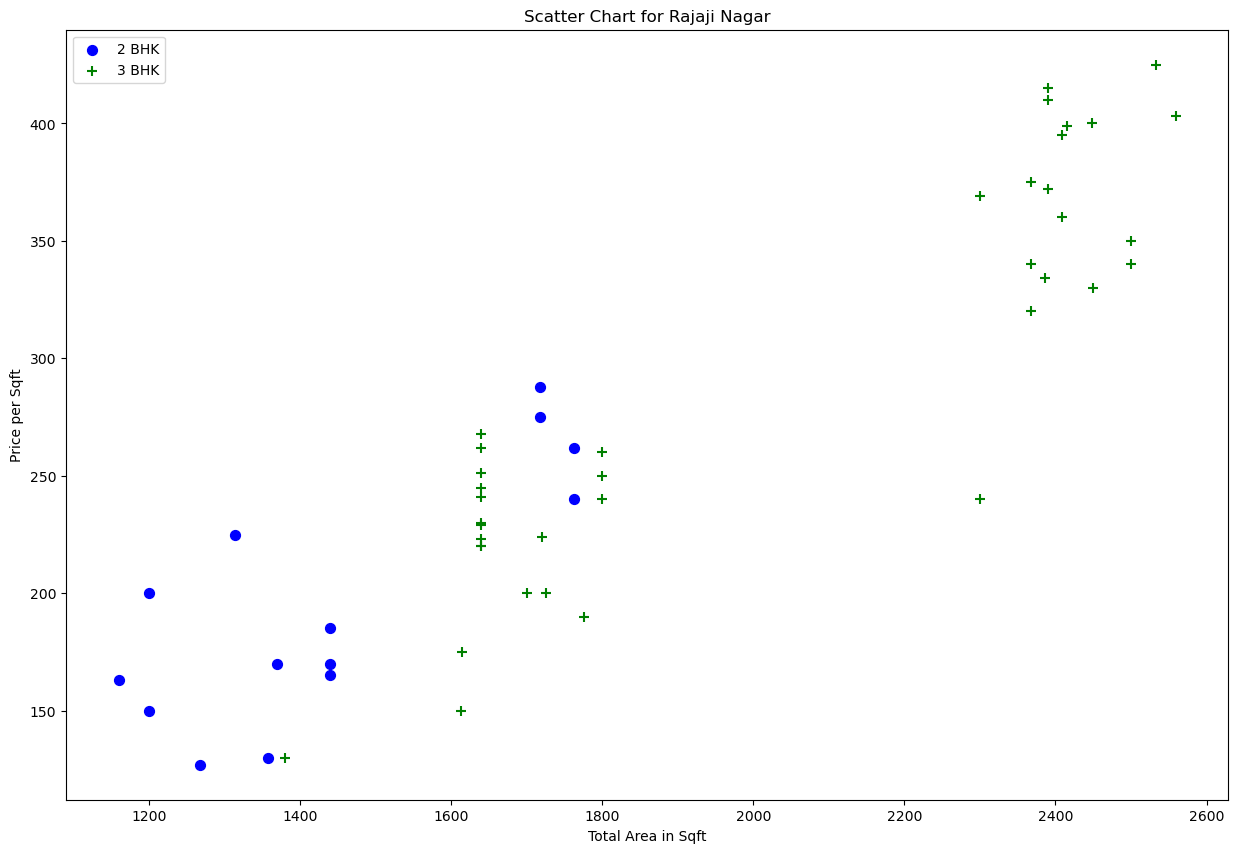

In [35]:
plot_scatter_chart(df7,'Rajaji Nagar') # Visualizing the scatter plot on raja ji nagar location to examine the data 

we should also remove properties where for same location the price of (for example) 3 bedrooms apartment is less then 2 bedroom apartment wuth same square ft area

what we will do is for a given location, we will build a dictionary of stats per bhk

as example :

{
    '1' :{

        'mean' : 4000,

        'std': 2000,

        'count': 34

    },

    '2' :{

        'mean' : 4300,

        'std': 2300,

        'count': 22

    },    
    
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less then mean price_per_sqft of BHK apartment

In [36]:
def remove_outliar_bhk(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("bhk"):
           bhk_stats[bhk]={
               'mean':np.mean(bhk_df.Price_per_sqft)  ,
               'std': np.std(bhk_df.Price_per_sqft),
               'count': bhk_df.shape[0]
           }
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] >5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.Price_per_sqft < (stats['mean'])].index.values)
    
    return df.drop(exclude_indices,axis='index')

df8=remove_outliar_bhk(df7)
df8.shape

(7329, 7)

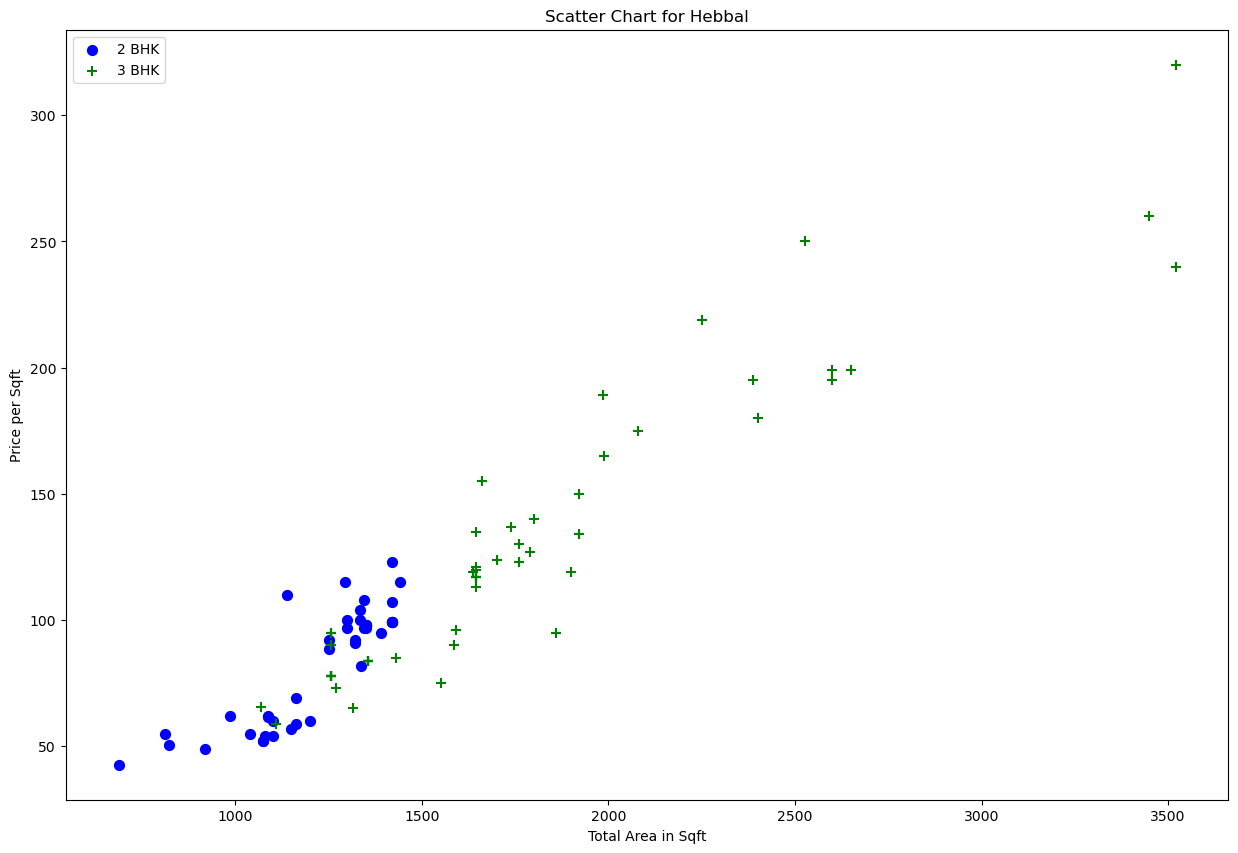

In [37]:
plot_scatter_chart(df7,'Hebbal') #ploting the scatter plot on old data frame

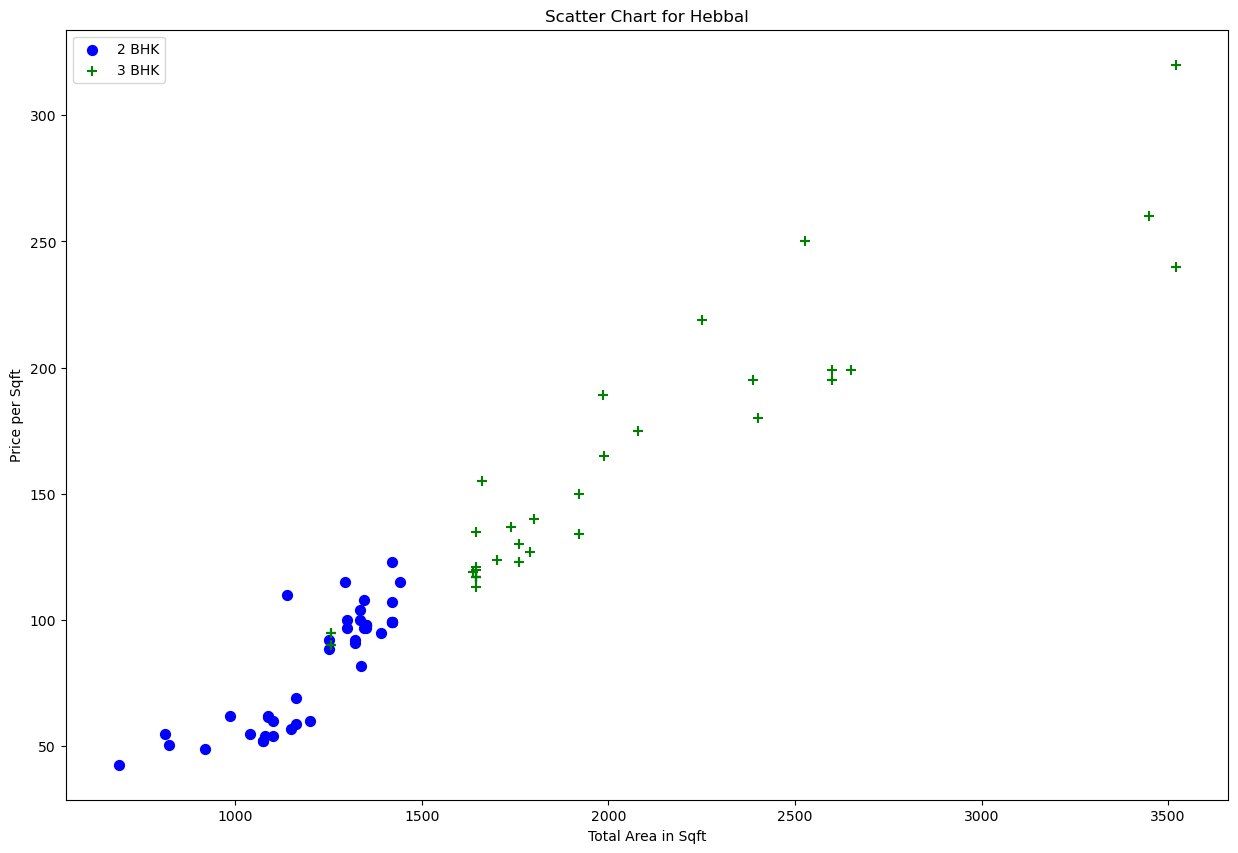

In [38]:
plot_scatter_chart(df8,'Hebbal') # applying the scatter plot on new dataframe

Text(0, 0.5, 'count')

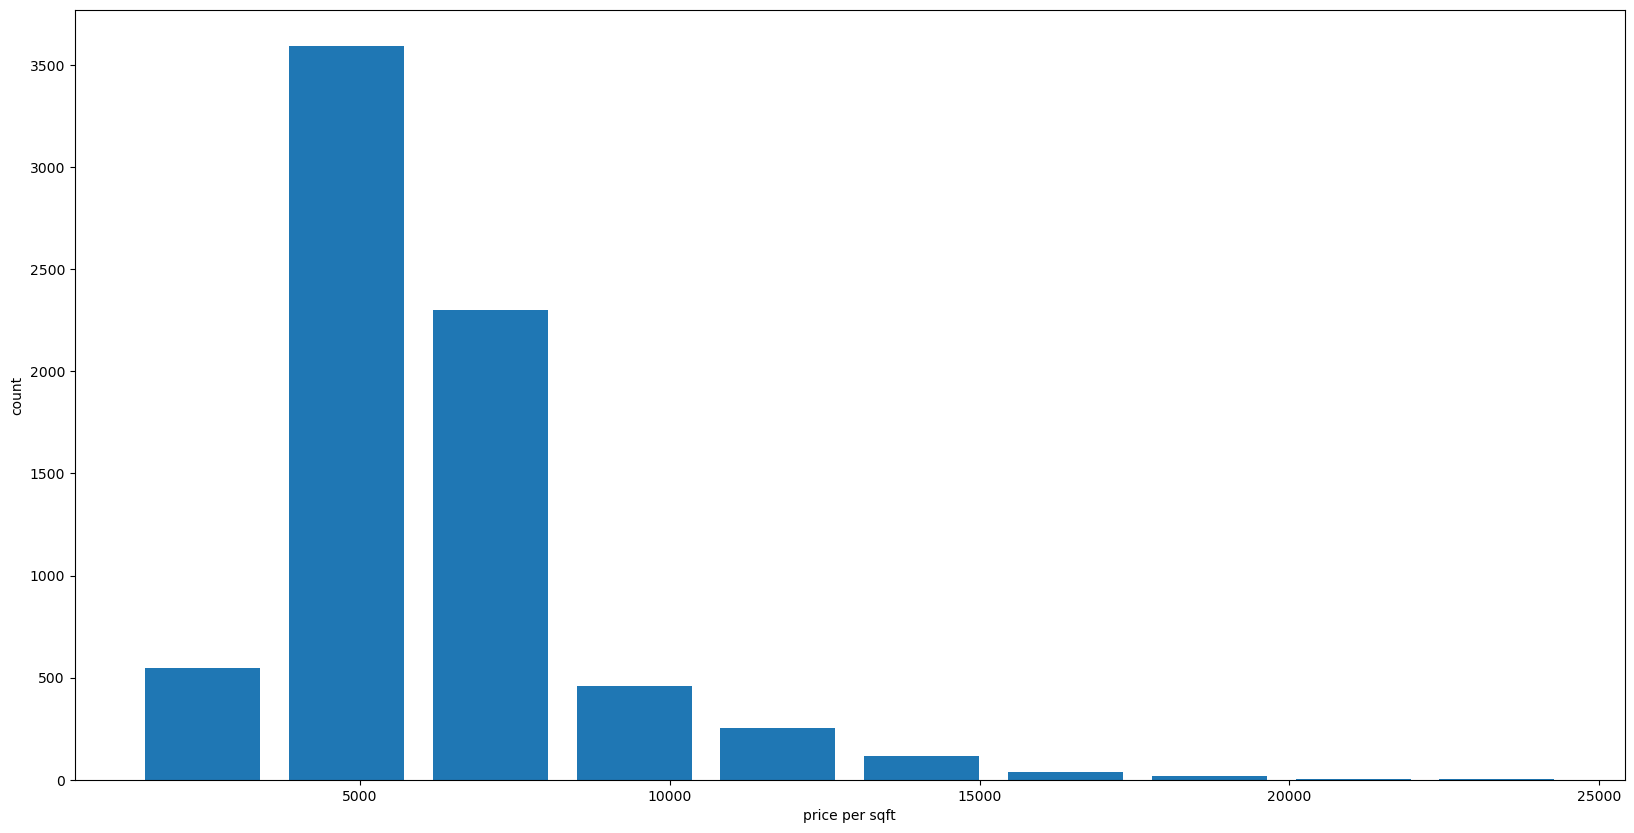

In [39]:
# Creating a histogram
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.Price_per_sqft,rwidth=0.8)
plt.xlabel('price per sqft')
plt.ylabel('count') # counting the data points of that histogram


In [40]:
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5925,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
6014,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6747,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
7078,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'counts')

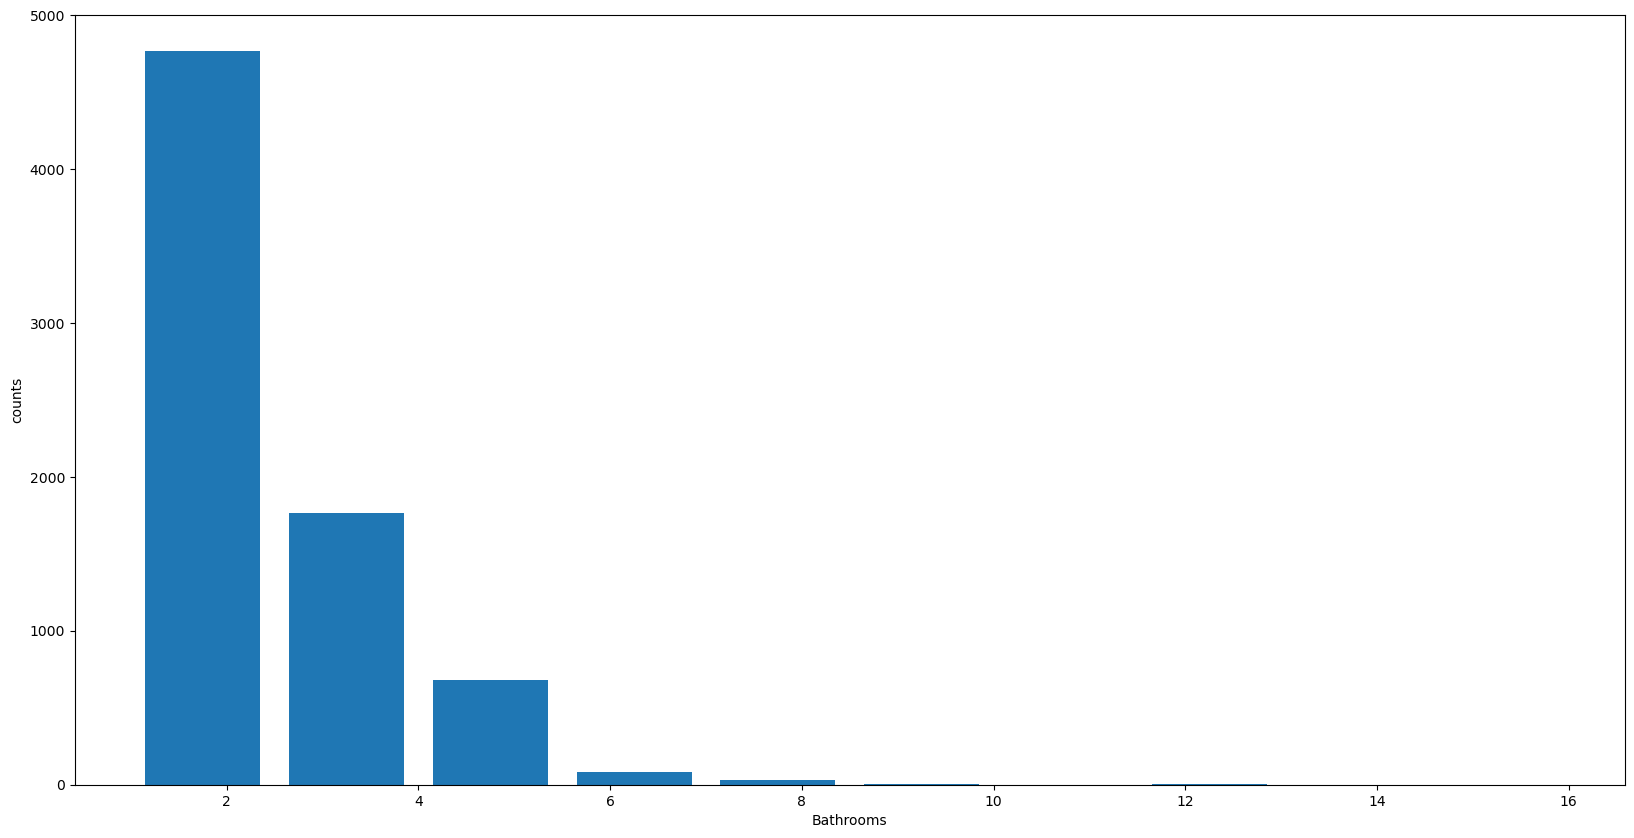

In [41]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('Bathrooms')
plt.ylabel('counts')


In [42]:
df8.bath.unique() # so here we know that bathroom has many unique values 

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [43]:
print ("lenth = ",len(df8[df8.bath > (df8.bhk + 2)]))
df8[df8.bath > (df8.bhk + 2)]

lenth =  4


,location,size,total_sqft,bath,price,bhk,Price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5850,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [44]:
df9=df8[df8.bath <df8.bhk + 2] # removing the bath's which are more then rooms 
print("shape =",df9.shape)
df9.head()

shape = (7251, 7)


,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [45]:
df10= df9.drop(columns={'size','Price_per_sqft'}) # Dropiing unnecessary columns 
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [46]:
## Getting dummy variables
dummy= pd.get_dummies(df10.location)
dummy = dummy.astype(int)
dummy.head()
# dummy.Other

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# concating Duummy varibales with our dataframe and droping the 'Other' column 
df11=pd.concat([df10,dummy.drop(columns={'Other'})],axis='columns')
df11.head()


,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df12 = df11.drop(columns={'location'})

In [49]:
x = df12.drop(columns={'price'})
y = df12['price']


In [50]:
from sklearn.model_selection import train_test_split

X_train , x_test , Y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
model.score(x_test,y_test)

0.869191445217462

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
scores=cross_val_score(LinearRegression(),x,y ,cv=cv)
scores.mean()

0.8533729605241016

In [53]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [54]:
# import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor


# This function is going to give us the best algorithem for our model
# This is called hypermeter tuning 
def find_best_model(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # 'normalize': [True, False]  # This parameter is no longer valid
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']  # Fixed typo here
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Updated parameter name
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


find_best_model(x, y)


,model,best_score,best_params
0,linear_regression,0.853710,{'fit_intercept': False}
1,lasso,0.727543,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.688300,"{'criterion': 'squared_error', 'splitter': 'be..."


In [55]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [56]:
def price_prediction(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    X=np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >=1: # For location we know we have 240 columns so for locating the appropriate column
        X[loc_index] = 1
    return model.predict([X])[0]
price_prediction('1st Phase JP Nagar'  ,1000,2,2)

c:\Users\reals\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.81981031280398

In [57]:
price_prediction('Vishveshwarya Layout'  ,7300,4,4)

c:\Users\reals\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


557.6589429398858

## Importing into pickle file 

In [58]:
import pickle
with open('Bangaluru_house_price_model.pickle','wb') as file:
    pickle.dump(model, file)  # dump the model to the file

In [59]:
# we also need the columns information indexing as we have in our model we need to import that info into json file
# we will use the columns info to create the json file

import json
columns ={
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json','w') as file:
    file.write(json.dumps(columns))

